In [32]:
# import library and load dataset

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from mpl_toolkits.mplot3d import Axes3D

In [33]:
# load dataset
data_path = '../data/processed/data_cleaned_scaled.csv' 
data = pd.read_csv(data_path)

# form features and target
X = data.drop(['Target'], axis=1)
y = data['Target']
# numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
# X = data[numerical_cols]

In [34]:
# perform LOF outlier detection on X
# use contamination=auto to automatically detect the percentage of outliers
lof = LocalOutlierFactor(n_neighbors=20)
outliers1 = lof.fit_predict(X)

print(outliers1)

# count outliers
outliers1 = pd.Series(outliers1)
print(outliers1.value_counts())


[ 1  1  1 ... -1  1  1]
 1    4073
-1     351
Name: count, dtype: int64


In [35]:
# perform Isolation Forest, compare results
iforest = IsolationForest(contamination=0.02)
outliers2 = iforest.fit_predict(X)

print(outliers2)

# count outliers
outliers2 = pd.Series(outliers2)
print(outliers2.value_counts())

[1 1 1 ... 1 1 1]
 1    4335
-1      89
Name: count, dtype: int64


In [36]:
# perform Elliptic Envelope
ee = EllipticEnvelope(contamination=0.02)
outliers3 = ee.fit_predict(X)

print(outliers3)

# count outliers
outliers3 = pd.Series(outliers3)
print(outliers3.value_counts())


[1 1 1 ... 1 1 1]
 1    4335
-1      89
Name: count, dtype: int64


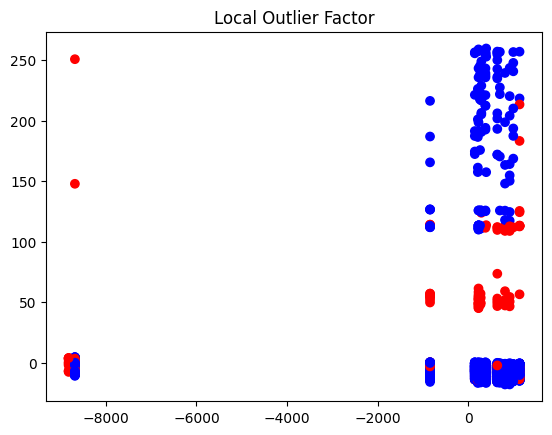

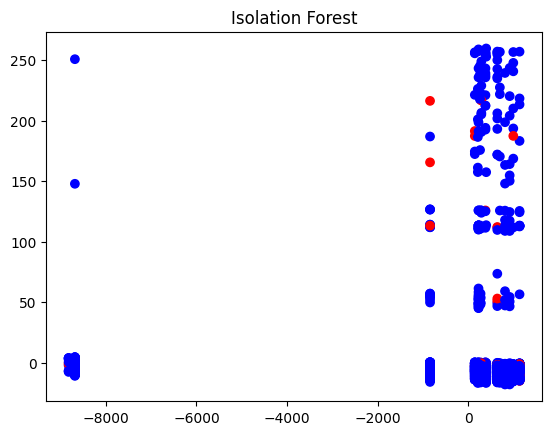

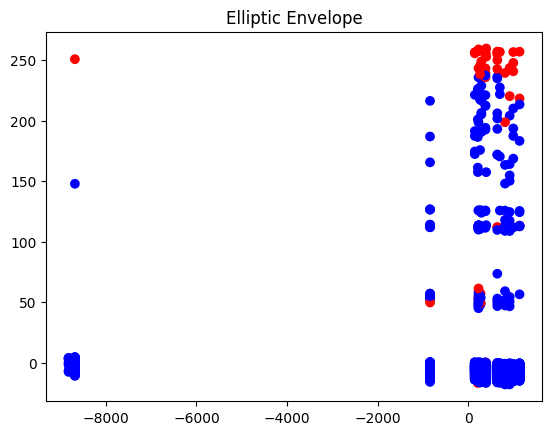

In [40]:
# set n_components to 2 for scatter plot
# set n_components to 10 for feature selection
n_components = 2
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

# plot scatter of X_pca, color by outliers
if n_components == 2:
    colors = ['red' if x == -1 else 'blue' for x in outliers1]
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors)
    plt.title('Local Outlier Factor')
    plt.show()

    # value 1 blue, value -1 red
    colors = ['red' if x == -1 else 'blue' for x in outliers2]
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors)
    plt.title('Isolation Forest')
    plt.show()

    colors = ['red' if x == -1 else 'blue' for x in outliers3]
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors)
    plt.title('Elliptic Envelope')
    plt.show()

if n_components==3:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    colors = ['red' if x == -1 else 'blue' for x in outliers1]
    ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=colors)
    plt.title('Local Outlier Factor')
    plt.colorbar(label="Outlier (-1) / Inlier (1)")
    plt.show()

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    colors = ['red' if x == -1 else 'blue' for x in outliers2]
    ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=colors)
    plt.title('Isolation Forest')
    plt.colorbar(label="Outlier (-1) / Inlier (1)")
    plt.show()

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    colors = ['red' if x == -1 else 'blue' for x in outliers3]
    ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=colors)
    plt.title('Elliptic Envelope')
    plt.colorbar(label="Outlier (-1) / Inlier (1)")
    plt.show()


